In [1]:
#Saturation Curves

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import pickle
import time
random.seed(22)

In [3]:
time.sleep(4000)

KeyboardInterrupt: 

In [4]:
fh = open('A549_read_to_gene_dict', 'rb')
A549_read_dict = pickle.load(fh)
fh.close()

In [5]:
fh = open('HEPG2_read_to_gene_dict', 'rb')
HepG2_read_dict = pickle.load(fh)
fh.close()

In [6]:
fh = open('NTERA_read_to_gene_dict', 'rb')
NTERA_read_dict = pickle.load(fh)
fh.close()

In [7]:
fh = open('SHSY5Y_read_to_gene_dict', 'rb')
SHSY5Y_read_dict = pickle.load(fh)
fh.close()

In [8]:
fh = open('HeLa_read_to_gene_dict', 'rb')
HeLa_read_dict = pickle.load(fh)
fh.close()

In [9]:
len(set(HeLa_read_dict.values()))

17570

In [10]:
count = 0
for value in HeLa_read_dict.values():
    if "RP11" in value:
        count += 1
print(count)

16064


In [11]:
#Establish representative samples 100k reads for each 

In [12]:
def genes_from_reads(read_dict, n):
    gene_set = set()
    reads = random.sample(list(read_dict.keys()), n)
    for read in reads:
        gene_set.add(read_dict[read])
    return gene_set

def saturation(target_set, read_dict1, read_dict2, read_dict3, read_dict4, n):
    pooled_set = genes_from_reads(read_dict1, n).union(genes_from_reads(read_dict2, n), genes_from_reads(read_dict3, n), genes_from_reads(read_dict4, n))
    return(len(target_set.intersection(pooled_set))/len(target_set))

In [13]:
saturation(genes_from_reads(HeLa_read_dict, 1000000), A549_read_dict, HepG2_read_dict, SHSY5Y_read_dict, NTERA_read_dict, 1000000)

0.9550959699695446

In [14]:
HeLa_rep = genes_from_reads(HeLa_read_dict, 1000000)
A549_rep = genes_from_reads(A549_read_dict, 1000000)
HepG2_rep = genes_from_reads(HepG2_read_dict, 1000000)
SHSY5Y_rep = genes_from_reads(SHSY5Y_read_dict, 1000000)
NTERA_rep = genes_from_reads(NTERA_read_dict, 1000000)

In [15]:
saturation_dict = {'HeLa':{}, 'A549':{}, 'NTERA':{}, 'SHSY5Y':{}, 'HepG2':{}}

In [16]:
for i in range(100):
    if i % 5 == 0:
        print(f"{i=}")
    for j in range(0,1000001,100000):
        if j % 500000 == 0:
            print(f"{j=}")
        for key in saturation_dict:
            if j not in saturation_dict[key]:
                saturation_dict[key][j] = {}
        saturation_dict['HeLa'][j][i]=saturation(HeLa_rep, A549_read_dict, HepG2_read_dict, SHSY5Y_read_dict, NTERA_read_dict, j)
        saturation_dict['A549'][j][i]=saturation(A549_rep, HeLa_read_dict, HepG2_read_dict, SHSY5Y_read_dict, NTERA_read_dict, j)
        saturation_dict['NTERA'][j][i]=saturation(NTERA_rep, A549_read_dict, HepG2_read_dict, SHSY5Y_read_dict, HeLa_read_dict, j)
        saturation_dict['SHSY5Y'][j][i]=saturation(SHSY5Y_rep, A549_read_dict, HepG2_read_dict, HeLa_read_dict, NTERA_read_dict, j)
        saturation_dict['HepG2'][j][i]=saturation(HepG2_rep, A549_read_dict, HeLa_read_dict, SHSY5Y_read_dict, NTERA_read_dict, j)


i=0
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=5
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=10
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=15
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=20
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=25
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=30
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=35
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=40
j=0
j=500000
j=1000000
j=0
j=500000
j

In [17]:
df_hela =pd.DataFrame.from_dict(saturation_dict['HeLa'], orient = 'index')
df_hela.reset_index(inplace=True)
df_hela.rename(columns={'index':'Samples'}, inplace=True)
df_hela = df_hela.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_hela = ['HeLa']*df_hela.shape[0]
df_hela['Cell_Line'] = cell_line_hela

In [18]:
df_a549 =pd.DataFrame.from_dict(saturation_dict['A549'], orient = 'index')
df_a549.reset_index(inplace=True)
df_a549.rename(columns={'index':'Samples'}, inplace=True)
df_a549 = df_a549.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_a549 = ['A549']*df_a549.shape[0]
df_a549['Cell_Line'] = cell_line_a549

In [19]:
df_shsy5y =pd.DataFrame.from_dict(saturation_dict['SHSY5Y'], orient = 'index')
df_shsy5y.reset_index(inplace=True)
df_shsy5y.rename(columns={'index':'Samples'}, inplace=True)
df_shsy5y = df_shsy5y.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_shsy5y = ['SHSY5Y']*df_shsy5y.shape[0]
df_shsy5y['Cell_Line'] = cell_line_shsy5y

In [20]:
df_ntera =pd.DataFrame.from_dict(saturation_dict['NTERA'], orient = 'index')
df_ntera.reset_index(inplace=True)
df_ntera.rename(columns={'index':'Samples'}, inplace=True)
df_ntera = df_ntera.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_ntera = ['NTERA']*df_ntera.shape[0]
df_ntera['Cell_Line'] = cell_line_ntera

In [21]:
df_hepg2 =pd.DataFrame.from_dict(saturation_dict['HepG2'], orient = 'index')
df_hepg2.reset_index(inplace=True)
df_hepg2.rename(columns={'index':'Samples'}, inplace=True)
df_hepg2 = df_hepg2.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_hepg2 = ['HepG2']*df_hepg2.shape[0]
df_hepg2['Cell_Line'] = cell_line_hepg2

In [22]:
df = pd.concat([df_hepg2, df_ntera, df_shsy5y, df_a549, df_hela], axis = 0, ignore_index=True)
df.head()
df.to_csv('NOFILTER_Round_Robin.csv')

In [23]:
sns.set(rc={"figure.figsize":(11.2, 7.858)}) #(width, height)

[Text(0.5, 1.0, 'Target cell line gene capture from subsampling the other 4 cell lines'),
 Text(0.5, 0, 'Reads Sampled from each of the 4 non-target Cell Lines'),
 Text(0, 0.5, 'Percent of target Cell line gene expression captured')]

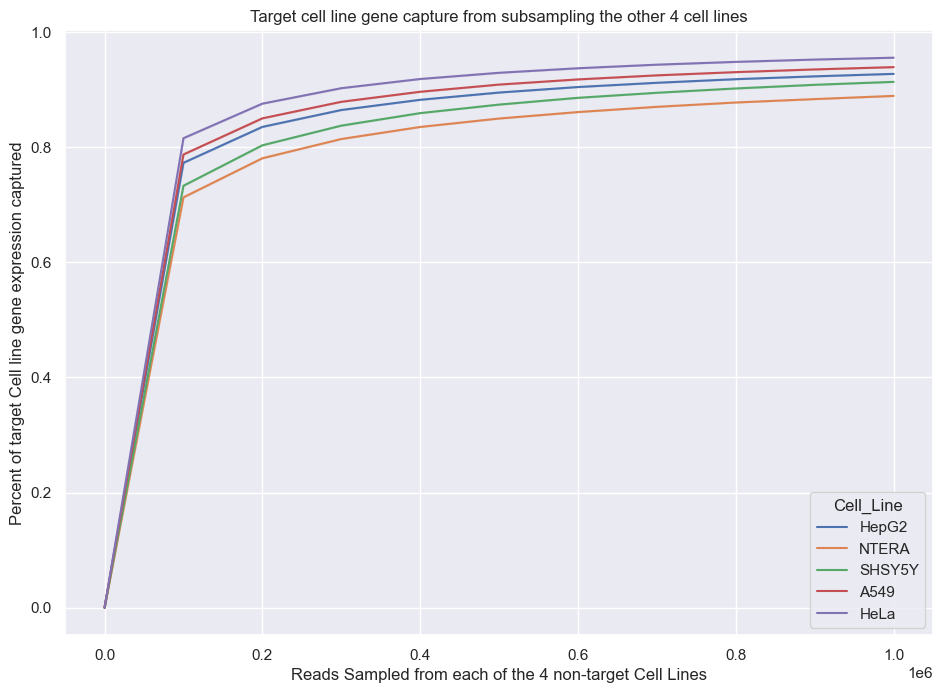

In [24]:
fig = sns.lineplot(data=df, x = 'Samples', y = 'Saturation', hue = 'Cell_Line')
fig.set(title = 'Target cell line gene capture from subsampling the other 4 cell lines', xlabel = 'Reads Sampled from each of the 4 non-target Cell Lines', ylabel = 'Percent of target Cell line gene expression captured')

In [ ]:
fig.get_figure().savefig('Round_robin_saturation.eps')

In [ ]:
fig.get_figure().savefig('Round_robin_saturation.png')

In [25]:
fig.get_figure().savefig('NOFILTER_Round_robin_saturation.pdf')